In [1]:
#importing Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#importing data
df = pd.read_csv("D:/Germany/Online_Certifications/Projects/Superstore Sales/train.csv")
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [8]:
#general overview of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [10]:
# overview of null values

df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [13]:
#filling empty column with 0

df["Postal Code"].fillna(0, inplace=True)

In [14]:
#checking again for null values
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [16]:
# changing psotal code data type from float to integer

df["Postal Code"] = df["Postal Code"].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int32  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

# Data Description

In [18]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9800.0,9800.000000
mean,4900.500000,0.0,230.769059
std,2829.160653,0.0,626.651875
min,1.000000,0.0,0.444000
25%,2450.750000,0.0,17.248000
50%,4900.500000,0.0,54.490000
75%,7350.250000,0.0,210.605000
max,9800.000000,0.0,22638.480000


# Data Cleaning
### Checking for duplicates

In [20]:
# using conditional if statement to check duplicates

if df.duplicated().sum() > 0:
    print('Duplicates are present')

else:
    print('No duplicates exist')

No duplicates exist


In [21]:
#another way for checking duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9795    False
9796    False
9797    False
9798    False
9799    False
Length: 9800, dtype: bool

# Exploratoraty Data Analysis
### Customer Analysis
### 1. Customer Segmentation

In [23]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [25]:
#type of customers

type_of_customers = df["Segment"].unique()
print(type_of_customers)

['Consumer' 'Corporate' 'Home Office']


In [42]:
#number of cutomers in each segments

number_of_customers =  df["Segment"].value_counts().reset_index()

number_of_customers = number_of_customers.rename(columns={'count':'Total Customers', 'Segment':'Customer Type'})

print(number_of_customers)

  Customer Type  Total Customers
0      Consumer             5101
1     Corporate             2953
2   Home Office             1746


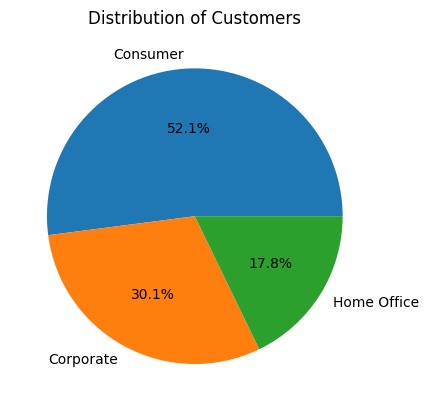

In [44]:
#plotting a pie chart

plt.pie(number_of_customers['Total Customers'], labels = number_of_customers['Customer Type'], autopct = '%1.1f%%')

#set pie chart labels

plt.title('Distribution of Customers')

plt.show()

# Customer Sales
### 2. Sales per Segment

In [49]:
#Total sales in each segments

sales_per_category =  df.groupby('Segment')['Sales'].sum().reset_index()

sales_per_category = sales_per_category.rename(columns={'Sales':'Total Sales', 'Segment':'Customer Type'})

print(sales_per_category)

  Customer Type   Total Sales
0      Consumer  1.148061e+06
1     Corporate  6.884941e+05
2   Home Office  4.249822e+05


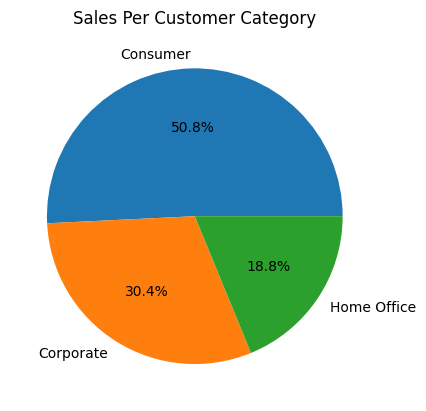

In [50]:
#plotting a pie chart

plt.pie(sales_per_category['Total Sales'], labels = sales_per_category['Customer Type'], autopct = '%1.1f%%')

#set pie chart labels

plt.title('Sales Per Customer Category')

plt.show()

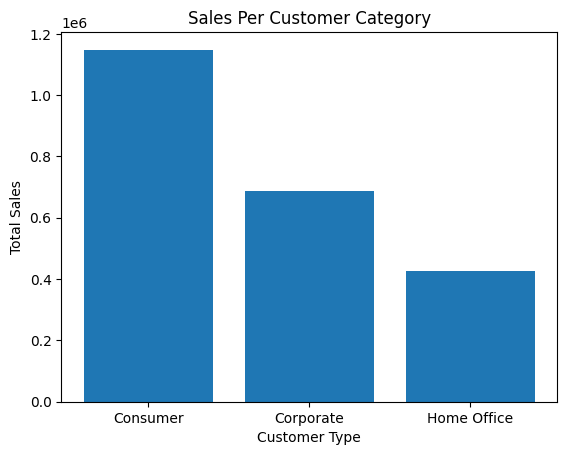

In [51]:
#Plotting a bar graph

plt.bar(sales_per_category['Customer Type'], sales_per_category['Total Sales'])

#creating Labels

plt.title('Sales Per Customer Category')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')

plt.show()

# Customer Loyalty

In [52]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [58]:
#Grouping data according to Customer ID, Customer Name, Segment; Calculate freq of their orders
customer_order_freq = df.groupby(['Customer ID','Customer Name','Segment'])['Order ID'].count().reset_index()

#rename orderID as Total orders
customer_order_freq  = customer_order_freq.rename(columns={'Order ID':'Total Orders'})

#Identifying repeat customers
repeat_customers = customer_order_freq[customer_order_freq['Total Orders'] >= 1]

#sorting repaet customers in descending orders
sorted_repeat_customers = repeat_customers.sort_values(by = 'Total Orders', ascending=False)

print(sorted_repeat_customers.head(10).reset_index(drop = True))

  Customer ID        Customer Name      Segment  Total Orders
0    WB-21850        William Brown     Consumer            35
1    PP-18955           Paul Prost  Home Office            34
2    MA-17560         Matt Abelman  Home Office            34
3    JL-15835             John Lee     Consumer            33
4    CK-12205  Chloris Kastensmidt     Consumer            32
5    SV-20365          Seth Vernon     Consumer            32
6    JD-15895     Jonathan Doherty    Corporate            32
7    AP-10915       Arthur Prichep     Consumer            31
8    ZC-21910     Zuschuss Carroll     Consumer            31
9    EP-13915           Emily Phan     Consumer            31


In [62]:
#Grouping data according to Customer ID, Customer Name, Sales; Calculate sales by customer Name
customer_sales = df.groupby(['Customer ID','Customer Name','Segment' ])['Sales'].sum().reset_index()

#sorting in descending orders
top_spenders = customer_sales.sort_values(by = 'Sales', ascending=False)

print(top_spenders.head(10).reset_index(drop = True))

  Customer ID       Customer Name      Segment      Sales
0    SM-20320         Sean Miller  Home Office  25043.050
1    TC-20980        Tamara Chand    Corporate  19052.218
2    RB-19360        Raymond Buch     Consumer  15117.339
3    TA-21385        Tom Ashbrook  Home Office  14595.620
4    AB-10105       Adrian Barton     Consumer  14473.571
5    KL-16645        Ken Lonsdale     Consumer  14175.229
6    SC-20095        Sanjit Chand     Consumer  14142.334
7    HL-15040        Hunter Lopez     Consumer  12873.298
8    SE-20110        Sanjit Engle     Consumer  12209.438
9    CC-12370  Christopher Conant     Consumer  12129.072


# Modes of Shipping

In [63]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [64]:
#unique values in ship mode

type_of_shipping = df['Ship Mode'].unique()
print(type_of_shipping)

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [68]:
# Frequency use of shipping method

ship_mode = df['Ship Mode'].value_counts().reset_index()

#rename count as Total count
ship_mode  = ship_mode.rename(columns={'count':'Total count'})

print(ship_mode)

        Ship Mode  Total count
0  Standard Class         5859
1    Second Class         1902
2     First Class         1501
3        Same Day          538


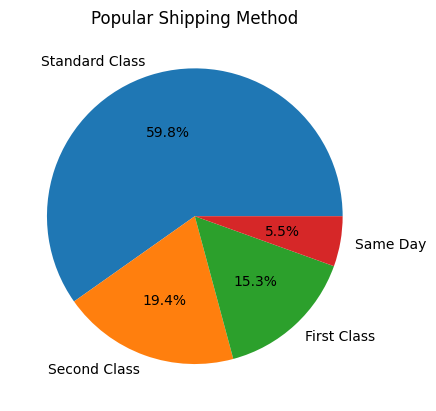

In [70]:
#plotting a pie chart

plt.pie(ship_mode['Total count'], labels = ship_mode ['Ship Mode'], autopct = '%1.1f%%')

#set pie chart labels

plt.title('Popular Shipping Method')

plt.show()

# Geographical Analysis of Cusotmer and Sales

In [74]:
# Number of customers in each state

state = df['State'].value_counts().reset_index()

#rename count as Total count
state  = state.rename(columns={'count':'Total customers'})

print(state)

                   State  Total customers
0             California             1946
1               New York             1097
2                  Texas              973
3           Pennsylvania              582
4             Washington              504
5               Illinois              483
6                   Ohio              454
7                Florida              373
8               Michigan              253
9         North Carolina              247
10              Virginia              224
11               Arizona              223
12             Tennessee              183
13              Colorado              179
14               Georgia              177
15              Kentucky              137
16               Indiana              135
17         Massachusetts              135
18                Oregon              122
19            New Jersey              122
20              Maryland              105
21             Wisconsin              105
22              Delaware          

In [75]:
#Top 10 states with highest customers

# Number of customers in each state
state = df['State'].value_counts().reset_index()

#rename count as Total count
state  = state.rename(columns={'count':'Total customers'})

print(state.head(10))

            State  Total customers
0      California             1946
1        New York             1097
2           Texas              973
3    Pennsylvania              582
4      Washington              504
5        Illinois              483
6            Ohio              454
7         Florida              373
8        Michigan              253
9  North Carolina              247


In [77]:
#Top 10 cities with highest customers
#customer by city
city= df['City'].value_counts().reset_index()

#rename count as Total count
city  = city.rename(columns={'count':'Total customers'})

print(city.head(10))

            City  Total customers
0  New York City              891
1    Los Angeles              728
2   Philadelphia              532
3  San Francisco              500
4        Seattle              426
5        Houston              374
6        Chicago              308
7       Columbus              221
8      San Diego              170
9    Springfield              161


In [80]:
#sales per states

state_sales = df.groupby(['State'])['Sales'].sum().reset_index()

#sorting states with highest to lowest 
top_state_sales = state_sales.sort_values(by='Sales', ascending=False)

print(top_state_sales.head(10))

           State        Sales
3     California  446306.4635
30      New York  306361.1470
41         Texas  168572.5322
45    Washington  135206.8500
36  Pennsylvania  116276.6500
8        Florida   88436.5320
11      Illinois   79236.5170
20      Michigan   76136.0740
33          Ohio   75130.3500
44      Virginia   70636.7200


In [81]:
#sales per city

city_sales = df.groupby(['City'])['Sales'].sum().reset_index()

#sorting states with highest to lowest 
top_city_sales = city_sales.sort_values(by='Sales', ascending=False)

print(top_city_sales.head(10))

              City        Sales
327  New York City  252462.5470
265    Los Angeles  173420.1810
450        Seattle  116106.3220
436  San Francisco  109041.1200
372   Philadelphia  108841.7490
207        Houston   63956.1428
80         Chicago   47820.1330
435      San Diego   47521.0290
216   Jacksonville   44713.1830
123        Detroit   42446.9440


# Product Category Segmentation

## 1. Product Analysis

In [82]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [85]:
#Types of Product Category

product_category = df['Category'].unique()
print(product_category)

['Furniture' 'Office Supplies' 'Technology']


In [88]:
#grouping data by product Category

#nunique() returns an integer indicating the number of unique values
subcategory_count = df.groupby('Category')['Sub-Category'].nunique().reset_index()   

#Sorting in ascending order
subcategory_count = subcategory_count.sort_values(by='Sub-Category', ascending=False)

print(subcategory_count.reset_index(drop=True))

          Category  Sub-Category
0  Office Supplies             9
1        Furniture             4
2       Technology             4


## 2. Sales per Product Category

In [91]:
#sales per product category

category_sales = df.groupby(['Category'])['Sales'].sum().reset_index()

#sorting states with highest to lowest 
category_sales = category_sales.sort_values(by='Sales', ascending=False)

print(category_sales.reset_index(drop=True))

          Category        Sales
0       Technology  827455.8730
1        Furniture  728658.5757
2  Office Supplies  705422.3340


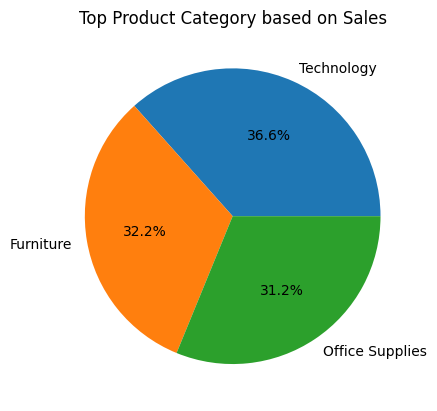

In [93]:
#plotting a pie chart

plt.pie(category_sales['Sales'], labels = category_sales['Category'], autopct = '%1.1f%%')

#set pie chart labels

plt.title('Top Product Category based on Sales')

plt.show()

## 3. Sales per Product

In [95]:
#grouping data by product sub-category vs sales

product_subcategory = df.groupby(['Sub-Category'])['Sales'].sum().reset_index()

#sorting in descending order
top_product_subcategory = product_subcategory.sort_values(by='Sales', ascending=False)

print(top_product_subcategory.reset_index(drop=True))

   Sub-Category        Sales
0        Phones  327782.4480
1        Chairs  322822.7310
2       Storage  219343.3920
3        Tables  202810.6280
4       Binders  200028.7850
5      Machines  189238.6310
6   Accessories  164186.7000
7       Copiers  146248.0940
8     Bookcases  113813.1987
9    Appliances  104618.4030
10  Furnishings   89212.0180
11        Paper   76828.3040
12     Supplies   46420.3080
13          Art   26705.4100
14    Envelopes   16128.0460
15       Labels   12347.7260
16    Fasteners    3001.9600


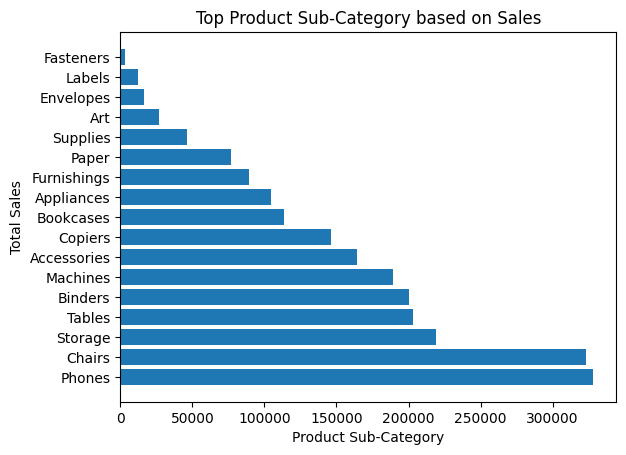

In [97]:
#Plotting a bar graph

plt.barh(top_product_subcategory['Sub-Category'], top_product_subcategory['Sales'])

#creating Labels

plt.title('Top Product Sub-Category based on Sales')
plt.xlabel('Product Sub-Category')
plt.ylabel('Total Sales')

plt.show()

# Sales

In [101]:
#converting order date to date time format

df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

#grouping by year and summing the sales per year

yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum()

#setting new index
#Renaming the column

yearly_sales = yearly_sales.reset_index()
yearly_sales = yearly_sales.rename(columns={'Order Date': 'Year', 'Sales': 'Total Sales'})

print(yearly_sales)

   Year  Total Sales
0  2015  479856.2081
1  2016  459436.0054
2  2017  600192.5500
3  2018  722052.0192


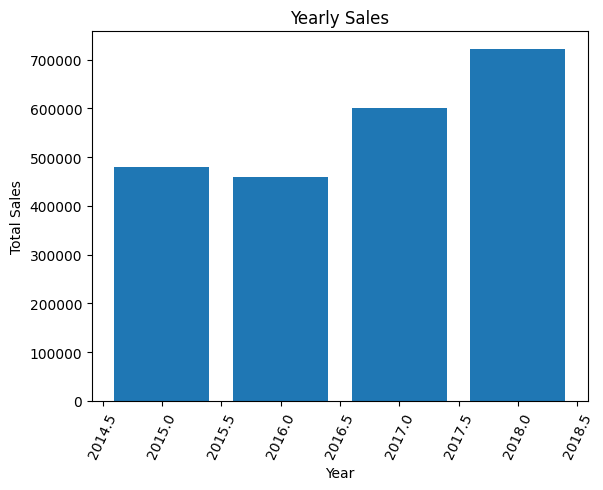

In [103]:
#Plotting a bar graph

plt.bar(yearly_sales['Year'], yearly_sales['Total Sales'])

#creating Labels

plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')

plt.xticks(rotation=65)
plt.show()

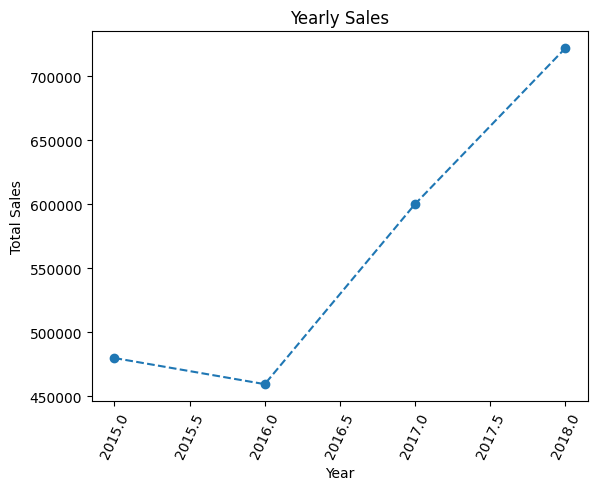

In [104]:
#Plotting a line graph

plt.plot(yearly_sales['Year'], yearly_sales['Total Sales'], marker='o', linestyle='--')

#creating Labels

plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')

plt.xticks(rotation=65)
plt.show()